In [49]:
import numpy as np
import pandas as pd
import matplotlib as npl
import matplotlib.pyplot as plt

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
fashion_mnist = keras.datasets.fashion_mnist

In [52]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [53]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
#Data Reshape

In [54]:
x_train_full=x_train_full.reshape((60000,28,28,1))

In [55]:
x_test = x_test.reshape((10000,28,28,1))

In [10]:
#normalisation

In [56]:
x_train_n= x_train_full/255.0

In [57]:
x_test_n= x_test/255.0

In [13]:
#splitting into training and validation set

In [58]:
x_valid,x_train = x_train_n[:5000],x_train_n[5000:]

In [59]:
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
x_test= x_test_n

In [ ]:
#Create model structure

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32,kernel_size=(3,3),strides=1,padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [66]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               1622700   
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [67]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd" ,
             metrics = ["accuracy"])

In [71]:
model_history = model.fit(x_train,y_train,epochs=20,batch_size=64, validation_data=(x_valid,y_valid))

Epoch 1/20
860/860 [==============================] - 38s 44ms/step - loss: 0.3961 - accuracy: 0.8572 - val_loss: 0.4331 - val_accuracy: 0.8414
Epoch 2/20
860/860 [==============================] - 36s 42ms/step - loss: 0.3772 - accuracy: 0.8642 - val_loss: 0.3859 - val_accuracy: 0.8542
Epoch 3/20
860/860 [==============================] - 35s 41ms/step - loss: 0.3626 - accuracy: 0.8689 - val_loss: 0.7345 - val_accuracy: 0.7430
Epoch 4/20
860/860 [==============================] - 37s 43ms/step - loss: 0.3484 - accuracy: 0.8748 - val_loss: 0.3517 - val_accuracy: 0.8736
Epoch 5/20
860/860 [==============================] - 37s 42ms/step - loss: 0.3375 - accuracy: 0.8765 - val_loss: 0.3462 - val_accuracy: 0.8780
Epoch 6/20
860/860 [==============================] - 36s 42ms/step - loss: 0.3246 - accuracy: 0.8822 - val_loss: 0.3277 - val_accuracy: 0.8822
Epoch 7/20
860/860 [==============================] - 36s 42ms/step - loss: 0.3147 - accuracy: 0.8870 - val_loss: 0.3552 - val_accuracy:

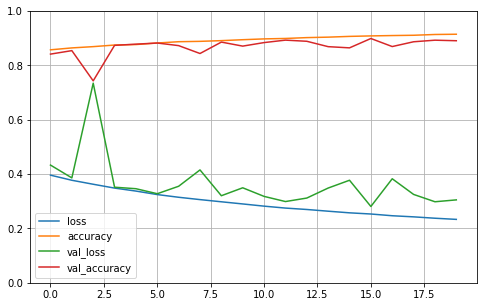

In [73]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [74]:
ev = model.evaluate(x_test_n,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3130 - accuracy: 0.8871


In [75]:
ev

[0.31300240755081177, 0.8870999813079834]

In [76]:
x_new = x_test[:3]

In [77]:
y_pred = model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [78]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


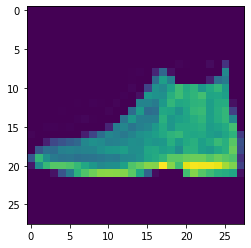

In [79]:
print(plt.imshow(x_test[0].reshape((28,28))))